In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [54]:
# Load the dataset

In [55]:
df=pd.read_csv('house_price_regression_dataset.csv')

In [56]:
# Understand the dataset

In [57]:
df.shape

(1000, 8)

In [58]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [60]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [61]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
# Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define train-test split sizes
train_sizes = [0.5, 0.75]  # Adjusted to valid float values
test_size = 0.3
random_seed = 42

# Train Test Split

In [64]:
target = 'House_Price'
features = [col for col in df.columns if col != target]

In [65]:
X = df[features]
y = df[target]

In [66]:
def evaluate_model(X, y, test_size, random_seed, dataset_fraction):
    # Reduce dataset size if needed
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=dataset_fraction, random_state=random_seed)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=test_size,
                                                        random_state=random_seed)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation results
    print(f"\nTrain Size: {dataset_fraction * 100}% | Test Size: {test_size * 100}% | Random Seed: {random_seed}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.4f}")

    return mse, r2

# Evaluate the model

In [67]:
train_test_splits = [0.3, 0.2, 0.1]  
random_seeds = [42, 7, 21]  
dataset_sizes = [0.25, 0.5, 0.75, 1.0]  

In [68]:
results = []

for test_size in train_test_splits:
    for seed in random_seeds:
        for size in dataset_sizes:
            mse, r2 = evaluate_model(X, y, test_size, seed, size)
            results.append((size, test_size, seed, mse, r2))


Train Size: 25.0% | Test Size: 30.0% | Random Seed: 42
Mean Squared Error: 61106327.30
R² Score: 0.9991

Train Size: 50.0% | Test Size: 30.0% | Random Seed: 42
Mean Squared Error: 98373292.33
R² Score: 0.9985

Train Size: 75.0% | Test Size: 30.0% | Random Seed: 42
Mean Squared Error: 91276310.99
R² Score: 0.9986


InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

In [69]:
results_df = pd.DataFrame(results, columns=['Dataset Size', 'Test Size', 'Random Seed', 'MSE', 'R2 Score'])
print("\nFinal Results Summary:\n", results_df)



Final Results Summary:
    Dataset Size  Test Size  Random Seed           MSE  R2 Score
0          0.25        0.3           42  6.110633e+07  0.999094
1          0.50        0.3           42  9.837329e+07  0.998460
2          0.75        0.3           42  9.127631e+07  0.998637


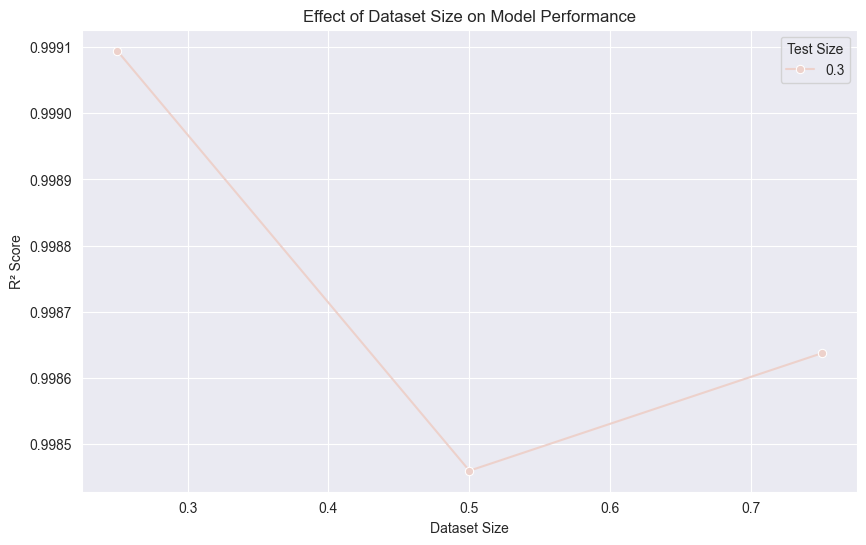

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="Dataset Size", y="R2 Score", hue="Test Size", marker="o")
plt.title("Effect of Dataset Size on Model Performance")
plt.xlabel("Dataset Size")
plt.ylabel("R² Score")
plt.legend(title="Test Size")
plt.grid(True)
plt.show()